# Guia de análise exploratória de dados com Python e SQL

Download: http://github.com/dsacademybr
        
Neste Mini-Projeto vamos apresentar um guia básico de análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Usaremos dados reais disponíveis publicamente, dados sobre filmes no IMDB.

Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

1- Quais São as Categorias de Filmes Mais Comuns no IMDB?

2- Qual o Número de Títulos Por Gênero

3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.

7- Qual a Relação Entre Duração e Gênero?

8- Qual o Número de Filmes Produzidos Por País?

9- Quais São os Top 10 Melhores Filmes?

10- Quais São os Top 10 Piores Filmes?

In [5]:
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.8.10


In [60]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [10]:
%%time
!imdb-sqlite

2021-11-02 16:59:46,407 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2021-11-02 16:59:53,874 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2021-11-02 17:00:01,695 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2021-11-02 17:00:14,586 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2021-11-02 17:00:27,742 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2021-11-02 17:00:28,968 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2021-11-02 17:00:29,312 Populating database: imdb.db
2021-11-02 17:00:29,312 Applying schema
2021-11-02 17:00:29,313 Importing file: downloads/name.basics.tsv.gz
2021-11-02 17:00:29,313 Reading number of rows ...
2021-11-02 17:00:32,789 Inserting rows into table: people
100%|████████████████████████| 11341915/11341915 [01:09<00:00, 163318

In [12]:
conn = sqlite3.connect("imdb.db")

In [14]:
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [15]:
tabelas.head()

Table_Name
0     people
1     titles
2       akas
3       crew
4   episodes

In [16]:
tabelas = tabelas["Table_Name"].values.tolist()

In [19]:
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela: ", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela:  people


cid       name     type  notnull dflt_value  pk
0    0  person_id  VARCHAR        0       None   1
1    1       name  VARCHAR        0       None   0
2    2       born  INTEGER        0       None   0
3    3       died  INTEGER        0       None   0

----------------------------------------------------------------------------------------------------


Esquema da tabela:  titles


cid             name     type  notnull dflt_value  pk
0    0         title_id  VARCHAR        0       None   1
1    1             type  VARCHAR        0       None   0
2    2    primary_title  VARCHAR        0       None   0
3    3   original_title  VARCHAR        0       None   0
4    4         is_adult  INTEGER        0       None   0
5    5        premiered  INTEGER        0       None   0
6    6            ended  INTEGER        0       None   0
7    7  runtime_minutes  INTEGER        0       None   0
8    8           genres  VARCHAR        0       None   0

----------------------------------------------------------------------------------------------------


Esquema da tabela:  akas


cid               name     type  notnull dflt_value  pk
0    0           title_id  VARCHAR        0       None   0
1    1              title  VARCHAR        0       None   0
2    2             region  VARCHAR        0       None   0
3    3           language  VARCHAR        0       None   0
4    4              types  VARCHAR        0       None   0
5    5         attributes  VARCHAR        0       None   0
6    6  is_original_title  INTEGER        0       None   0

----------------------------------------------------------------------------------------------------


Esquema da tabela:  crew


cid        name     type  notnull dflt_value  pk
0    0    title_id  VARCHAR        0       None   0
1    1   person_id  VARCHAR        0       None   0
2    2    category  VARCHAR        0       None   0
3    3         job  VARCHAR        0       None   0
4    4  characters  VARCHAR        0       None   0

----------------------------------------------------------------------------------------------------


Esquema da tabela:  episodes


cid              name     type  notnull dflt_value  pk
0    0  episode_title_id  INTEGER        0       None   0
1    1     show_title_id  INTEGER        0       None   0
2    2     season_number  INTEGER        0       None   0
3    3    eposide_number  INTEGER        0       None   0

----------------------------------------------------------------------------------------------------


Esquema da tabela:  ratings


cid      name     type  notnull dflt_value  pk
0    0  title_id  VARCHAR        0       None   1
1    1    rating  INTEGER        0       None   0
2    2     votes  INTEGER        0       None   0

----------------------------------------------------------------------------------------------------




# 1 - Quais São as Categorias de Filmes Mais Comuns no IMDB?

Quais são os principais TIPOS (categorias) dos TÍTULOS (filmes)?

In [38]:
consulta1 = '''SELECT type, COUNT(*) AS count FROM titles GROUP BY type ORDER BY count DESC'''

In [39]:
resultado1 = pd.read_sql_query(consulta1, conn)

In [40]:
display(resultado1)

type    count
0      tvEpisode  6140990
1          short   839309
2          movie   592745
3          video   326927
4       tvSeries   215516
5        tvMovie   133531
6   tvMiniSeries    40444
7      tvSpecial    34682
8      videoGame    29610
9        tvShort    10359
10       tvPilot        2

In [41]:
resultado1['percentual'] = (resultado1['count']/resultado1['count'].sum())*100

In [42]:
display(resultado1)

type    count  percentual
0      tvEpisode  6140990   73.420679
1          short   839309   10.034642
2          movie   592745    7.086763
3          video   326927    3.908686
4       tvSeries   215516    2.576674
5        tvMovie   133531    1.596475
6   tvMiniSeries    40444    0.483542
7      tvSpecial    34682    0.414652
8      videoGame    29610    0.354012
9        tvShort    10359    0.123851
10       tvPilot        2    0.000024

In [48]:
others = {}

display(resultado1['percentual']<5)

display(resultado1[resultado1['percentual']<5])

display(resultado1[resultado1['percentual']<5]['count'])

display(resultado1[resultado1['percentual']<5]['count'].sum())

display(resultado1[resultado1['percentual']<5]['percentual'])

display(resultado1[resultado1['percentual']<5]['percentual'].sum())

0     False
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
Name: percentual, dtype: bool

type   count  percentual
3          video  326927    3.908686
4       tvSeries  215516    2.576674
5        tvMovie  133531    1.596475
6   tvMiniSeries   40444    0.483542
7      tvSpecial   34682    0.414652
8      videoGame   29610    0.354012
9        tvShort   10359    0.123851
10       tvPilot       2    0.000024

3     326927
4     215516
5     133531
6      40444
7      34682
8      29610
9      10359
10         2
Name: count, dtype: int64

791071

3     3.908686
4     2.576674
5     1.596475
6     0.483542
7     0.414652
8     0.354012
9     0.123851
10    0.000024
Name: percentual, dtype: float64

9.457916348591572

In [51]:
others['count'] = resultado1[resultado1['percentual']<5]['count'].sum()

others['percentual'] = resultado1[resultado1['percentual']<5]['percentual'].sum()

others['type'] = 'others'

others

{'count': 791071, 'percentual': 9.457916348591572, 'type': 'others'}

In [53]:
resultado1 = resultado1[resultado1['percentual']>5]

In [54]:
resultado1 = resultado1.append(others, ignore_index = True)

In [55]:
resultado1 = resultado1.sort_values(by = 'count', ascending = False)

In [56]:
resultado1.head()

type    count  percentual
0  tvEpisode  6140990   73.420679
1      short   839309   10.034642
3     others   791071    9.457916
2      movie   592745    7.086763

In [57]:
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

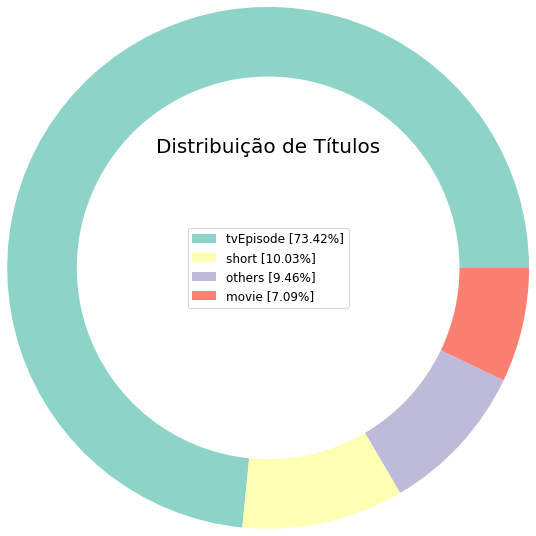

In [62]:
cs = cm.Set3(np.arange(100))

f = plt.figure()

plt.pie(resultado1['count'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width=0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title('Distribuição de Títulos', loc = 'Center', fontdict = {'fontsize':20, 'fontweight': 20})
plt.show()